Metodo de Jacobi

Ejercicio 1

Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: 
Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: 
Converge
x1= 0
x1= -0.2222222222222222
x1= -0.23888888888888887
x1= -0.37469135802469133
x1= -0.3911111111111111
x1= -0.3803823731138546
x1= -0.38986248285322356
x1= -0.3921388507849413
x1= -0.39043191491388507
x1= -0.39099324660451484
x1= -0.3913283483208861
x1= -0.39114094900321716
x1= -0.3911563805701738
x1= -0.39120003259222985
x1= -0.39118356484124367
x2= 0
x2= 0.375
x2= 0.9444444444444444
x2= 0.9069444444444444
x2= 0.8865354938271605
x2= 0.9357407407407407
x2= 0.9345340363511659
x2= 0.9285161822702332
x2= 0.9325872008840116
x2= 0.9330249145042677
x2= 0.9321782746043009
x2= 0.9324673098930549
x2= 0.9325778270369058
x2= 0.9324839334637416
x2= 0.9324973931158823
x3= 0
x3= -0.6
x3= -0.5166666666666666
x3= -0.29388888888888887
x3= -0.34962962962962957
x3= -0.36271913580246906
x3= -0.33981841563786
x3= -0.3431

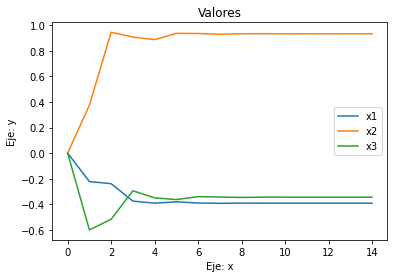

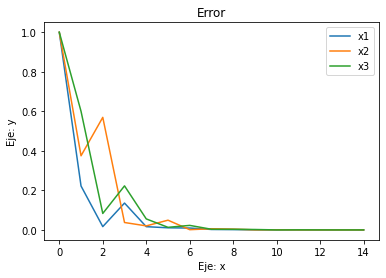

In [13]:
#   Sistema de ecuaciones
from matplotlib import pyplot as plt

x1_reg = []
x2_reg = []
x3_reg = []

error_x1 = []
error_x1.append(1)
error_x2 = []
error_x2.append(1)
error_x3 = []
error_x3.append(1)

def igualar():
    if not x1_reg:
        x1_reg.append(0)
    if len(x2_reg) < len(x1_reg):
        x2_reg.append(0)
    if len(x3_reg) < len(x1_reg):
        x3_reg.append(0)

'''
9x + 2y − z = −2    ->   x   x1 = (-2/9) - ((2/9) * x2 ) - ((1/9) * x3)
7x + 8y + 5z = 3    ->   y   x2 = (3/8) - ((7/8) * x1) - ((5/8) * x3)
3x + 4y − 10z = 6   ->   z   x3 = (6/-10) - ((3/-10) * x1) - ((4/-10) * x2)

5x1 + 2x2 = 12  ->  x1 = (12/5) - ((2/5) * x2)
−x1 + 10x2 = 8  ->  x2 = (8/10) + ((1/10) * x1)

8x1 + x2 = 4    ->  x1 = (4/8) - ((1/8) * x2)
2x1 + 5x2 = 3   ->  x2 = (3/5) - ((2/5) * x1)
x1 + 4x3 = 3    ->  x3 = (3/4) - ((1/4) * x1)

6x1 + 2x2 + x3 = 22     ->  x1 = (22/6) - ((2/6) * x2) - ((1/6) * x3)
−x1 + 8x2 + 2x3 = 20    ->  x2 = (20/8) + ((1/8) * x1) - ((3/8) * x3)
x1 − x2 + 6x3 = 23      ->  x3 = (23/6) - ((1/6) * x1) + ((1/6) * x2)
'''

def gn(v,x1,x2,x3):
    if v == 1:
        return ((-2/9) - ((2/9) * x2 ) - ((1/9) * x3))
    elif v == 2:
        return ((3/8) - ((7/8) * x1) - ((5/8) * x3))
    elif v == 3:
        return ((6/-10) - ((3/-10) * x1) - ((4/-10) * x2))

def convergencia():
    contador = 0
    num = 3 #Numero de incognitas
    v = 1

    parada = input("Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: ")
    if(parada == ""):
        parada = 0.0001

    a = input("Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: ")

    if a == "":
        igualar()

    elif a != "":
        x1_reg.append(float(a))
        x2_reg.append(float(input("x2: ")))
        x3_reg.append(float(input("x3: ")))

    igualar()

    while(contador <= 500):
        if v > num:
            igualar()

            if( error_x1[contador] <= float(parada) and error_x2[contador] <= float(parada) and error_x3[contador] <= float(parada)):
                return contador

            contador += 1
            v = 1

        x1 = float(x1_reg[contador])
        x2 = float(x2_reg[contador])
        x3 = float(x3_reg[contador])

        x = gn(v,x1,x2,x3)

        if v == 1:
            x1_reg.append(x)
            error_x1.append(abs(x1_reg[contador + 1] - x1_reg[contador]))
        elif v == 2:
            x2_reg.append(x)
            error_x2.append(abs(x2_reg[contador + 1] - x2_reg[contador]))
        elif v == 3:
            x3_reg.append(x)
            error_x3.append(abs(x3_reg[contador + 1] - x3_reg[contador]))

        v += 1
    return contador

def mostrar(contador):
    if(contador < 500):
        print("Converge")
    else:
        print("No converge")

    for registro in x1_reg:
        print("x1=", registro)
    for registro in x2_reg:
        print("x2=", registro)
    for registro in x3_reg:
        print("x3=", registro)

    for registro in error_x1:
        print("Error x1:", registro)
    for registro in error_x2:
        print("Error x2:", registro)
    for registro in error_x3:
        print("Error x3:", registro)

    plt.plot(x1_reg,label='x1')
    plt.plot(x2_reg,label='x2')
    plt.plot(x3_reg,label='x3')

    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Valores")
    plt.legend()
    plt.show()

    plt.plot(error_x1,label= 'x1')
    plt.plot(error_x2,label= 'x2')
    plt.plot(error_x3,label= 'x3')

    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Error")
    plt.legend()
    plt.show()

mostrar(convergencia())

Ejercicio 2

Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: 
Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: 
Converge
x1= 0
x1= 2.4
x1= 2.08
x1= 1.984
x1= 1.9968
x1= 2.0006399999999998
x1= 2.000128
x1= 1.9999744
x1= 1.9999948799999998
x1= 2.000001024
x2= 0
x2= 0.8
x2= 1.04
x2= 1.008
x2= 0.9984000000000001
x2= 0.99968
x2= 1.000064
x2= 1.0000128000000001
x2= 0.99999744
x2= 0.999999488
Error x1: 1
Error x1: 2.4
Error x1: 0.31999999999999984
Error x1: 0.09600000000000009
Error x1: 0.012799999999999923
Error x1: 0.0038399999999998435
Error x1: 0.0005119999999996239
Error x1: 0.00015360000000019802
Error x1: 2.0479999999878373e-05
Error x1: 6.144000000096739e-06
Error x2: 1
Error x2: 0.8
Error x2: 0.24
Error x2: 0.03200000000000003
Error x2: 0.009599999999999942
Error x2: 0.0012799999999999478
Error x2: 0.00038400000000005097
Error x2: 5.119999999991798e-05
Error x2: 1.5360000000130825e-05
Error x2: 2.0480000000322462e-06


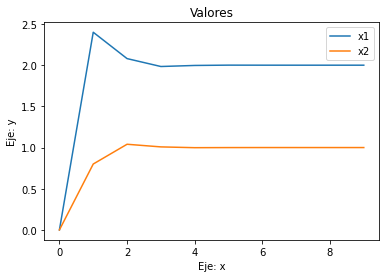

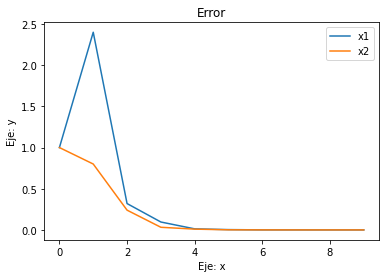

In [2]:
#   Sistema de ecuaciones
from matplotlib import pyplot as plt

x1_reg = []
x2_reg = []

error_x1 = []
error_x1.append(1)
error_x2 = []
error_x2.append(1)

def igualar():
    if not x1_reg:
        x1_reg.append(0)
    if len(x2_reg) < len(x1_reg):
        x2_reg.append(0)
    
'''
9x + 2y − z = −2    ->   x   x1 = (-2/9) - ((2/9) * x2 ) - ((1/9) * x3)
7x + 8y + 5z = 3    ->   y   x2 = (3/8) - ((7/8) * x1) - ((5/8) * x3)
3x + 4y − 10z = 6   ->   z   x3 = (6/-10) - ((3/-10) * x1) - ((4/-10) * x2)

5x1 + 2x2 = 12  ->  x1 = (12/5) - ((2/5) * x2)
−x1 + 10x2 = 8  ->  x2 = (8/10) + ((1/10) * x1)

8x1 + x2 = 4    ->  x1 = (4/8) - ((1/8) * x2)
2x1 + 5x2 = 3   ->  x2 = (3/5) - ((2/5) * x1)
x1 + 4x3 = 3    ->  x3 = (3/4) - ((1/4) * x1)

6x1 + 2x2 + x3 = 22     ->  x1 = (22/6) - ((2/6) * x2) - ((1/6) * x3)
−x1 + 8x2 + 2x3 = 20    ->  x2 = (20/8) + ((1/8) * x1) - ((3/8) * x3)
x1 − x2 + 6x3 = 23      ->  x3 = (23/6) - ((1/6) * x1) + ((1/6) * x2)
'''
        
def gn(v,x1,x2):
    if v == 1:
        return ((12/5) - ((2/5) * x2))
    elif v == 2:
        return ((8/10) + ((1/10) * x1))

def convergencia():
    contador = 0
    num = 2 #Numero de incognitas
    v = 1

    parada = input("Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: ")
    if(parada == ""):
        parada = 0.0001

    a = input("Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: ")

    if a == "":
        igualar()

    elif a != "":
        x1_reg.append(float(a))
        x2_reg.append(float(input("x2: ")))
        
    igualar()

    while(contador <= 500):
        if v > num:
            igualar()

            if( error_x1[contador] <= float(parada) and error_x2[contador] <= float(parada)):
                return contador
            
            contador += 1
            v = 1

        x1 = float(x1_reg[contador])
        x2 = float(x2_reg[contador])
    
        x = gn(v,x1,x2)

        if v == 1:
            x1_reg.append(x)
            error_x1.append(abs(x1_reg[contador + 1] - x1_reg[contador]))
        elif v == 2:
            x2_reg.append(x)
            error_x2.append(abs(x2_reg[contador + 1] - x2_reg[contador]))
            
        v += 1
    return contador

def mostrar(contador):
    if(contador < 500):
        print("Converge")
    else:
        print("No converge")

    for registro in x1_reg:
        print("x1=", registro)
    for registro in x2_reg:
        print("x2=", registro)
        
    for registro in error_x1:
        print("Error x1:", registro)
    for registro in error_x2:
        print("Error x2:", registro)
        
    plt.plot(x1_reg,label='x1')
    plt.plot(x2_reg,label='x2')
    
    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Valores")
    plt.legend()
    plt.show()

    plt.plot(error_x1,label= 'x1')
    plt.plot(error_x2,label= 'x2')
    
    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Error")
    plt.legend()
    plt.show()

mostrar(convergencia())

Ejercicio 3

Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: 
Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: 
Converge
x1= 0
x1= 0.5
x1= 0.35
x1= 0.4
x1= 0.385
x1= 0.39
x1= 0.3885
x1= 0.389
x1= 0.38885000000000003
x1= 0.3889
x1= 0.38888500000000004
x2= 0
x2= 0.6
x2= 0.39999999999999997
x2= 0.45999999999999996
x2= 0.43999999999999995
x2= 0.44599999999999995
x2= 0.44399999999999995
x2= 0.4446
x2= 0.44439999999999996
x2= 0.44445999999999997
x2= 0.44443999999999995
x3= 0
x3= 0.75
x3= 0.625
x3= 0.6625
x3= 0.65
x3= 0.65375
x3= 0.6525
x3= 0.652875
x3= 0.6527499999999999
x3= 0.6527875
x3= 0.652775
Error x1: 1
Error x1: 0.5
Error x1: 0.15000000000000002
Error x1: 0.050000000000000044
Error x1: 0.015000000000000013
Error x1: 0.0050000000000000044
Error x1: 0.0015000000000000013
Error x1: 0.0005000000000000004
Error x1: 0.00014999999999998348
Error x1: 4.999999999999449e-05
Error x1: 1.4999999999987246e-05
Error x2: 1
Error x2: 

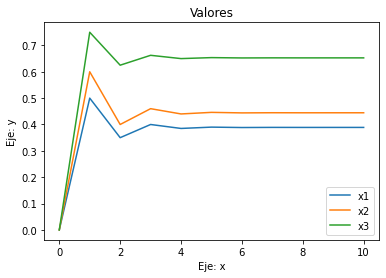

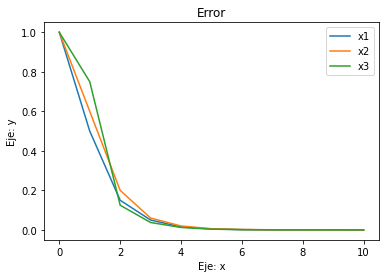

In [3]:
#   Sistema de ecuaciones
from matplotlib import pyplot as plt

x1_reg = []
x2_reg = []
x3_reg = []

error_x1 = []
error_x1.append(1)
error_x2 = []
error_x2.append(1)
error_x3 = []
error_x3.append(1)

def igualar():
    if not x1_reg:
        x1_reg.append(0)
    if len(x2_reg) < len(x1_reg):
        x2_reg.append(0)
    if len(x3_reg) < len(x1_reg):
        x3_reg.append(0)

'''
9x + 2y − z = −2    ->   x   x1 = (-2/9) - ((2/9) * x2 ) - ((1/9) * x3)
7x + 8y + 5z = 3    ->   y   x2 = (3/8) - ((7/8) * x1) - ((5/8) * x3)
3x + 4y − 10z = 6   ->   z   x3 = (6/-10) - ((3/-10) * x1) - ((4/-10) * x2)

5x1 + 2x2 = 12  ->  x1 = (12/5) - ((2/5) * x2)
−x1 + 10x2 = 8  ->  x2 = (8/10) + ((1/10) * x1)

8x1 + x2 = 4    ->  x1 = (4/8) - ((1/8) * x2)
2x1 + 5x2 = 3   ->  x2 = (3/5) - ((2/5) * x1)
x1 + 4x3 = 3    ->  x3 = (3/4) - ((1/4) * x1)

6x1 + 2x2 + x3 = 22     ->  x1 = (22/6) - ((2/6) * x2) - ((1/6) * x3)
−x1 + 8x2 + 2x3 = 20    ->  x2 = (20/8) + ((1/8) * x1) - ((3/8) * x3)
x1 − x2 + 6x3 = 23      ->  x3 = (23/6) - ((1/6) * x1) + ((1/6) * x2)
'''

def gn(v,x1,x2,x3):
    if v == 1:
        return ((4/8) - ((1/8) * x2))
    elif v == 2:
        return ((3/5) - ((2/5) * x1))
    elif v == 3:
        return ((3/4) - ((1/4) * x1))

def convergencia():
    contador = 0
    num = 3 #Numero de incognitas
    v = 1

    parada = input("Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: ")
    if(parada == ""):
        parada = 0.0001

    a = input("Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: ")

    if a == "":
        igualar()

    elif a != "":
        x1_reg.append(float(a))
        x2_reg.append(float(input("x2: ")))
        x3_reg.append(float(input("x3: ")))

    igualar()

    while(contador <= 500):
        if v > num:
            igualar()

            if( error_x1[contador] <= float(parada) and error_x2[contador] <= float(parada) and error_x3[contador] <= float(parada)):
                return contador

            contador += 1
            v = 1

        x1 = float(x1_reg[contador])
        x2 = float(x2_reg[contador])
        x3 = float(x3_reg[contador])

        x = gn(v,x1,x2,x3)

        if v == 1:
            x1_reg.append(x)
            error_x1.append(abs(x1_reg[contador + 1] - x1_reg[contador]))
        elif v == 2:
            x2_reg.append(x)
            error_x2.append(abs(x2_reg[contador + 1] - x2_reg[contador]))
        elif v == 3:
            x3_reg.append(x)
            error_x3.append(abs(x3_reg[contador + 1] - x3_reg[contador]))

        v += 1
    return contador

def mostrar(contador):
    if(contador < 500):
        print("Converge")
    else:
        print("No converge")

    for registro in x1_reg:
        print("x1=", registro)
    for registro in x2_reg:
        print("x2=", registro)
    for registro in x3_reg:
        print("x3=", registro)

    for registro in error_x1:
        print("Error x1:", registro)
    for registro in error_x2:
        print("Error x2:", registro)
    for registro in error_x3:
        print("Error x3:", registro)

    plt.plot(x1_reg,label='x1')
    plt.plot(x2_reg,label='x2')
    plt.plot(x3_reg,label='x3')

    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Valores")
    plt.legend()
    plt.show()

    plt.plot(error_x1,label= 'x1')
    plt.plot(error_x2,label= 'x2')
    plt.plot(error_x3,label= 'x3')

    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Error")
    plt.legend()
    plt.show()

mostrar(convergencia())

Ejercicio 4

Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: 
Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: 
Converge
x1= 0
x1= 3.6666666666666665
x1= 2.194444444444444
x1= 2.553240740740741
x1= 2.5765817901234565
x1= 2.5849569187242794
x1= 2.574453178583676
x1= 2.5732460946430615
x1= 2.573844901528087
x1= 2.574192408568635
x1= 2.5741760052218075
x1= 2.5741349052110882
x1= 2.5741277118928463
x2= 0
x2= 2.5
x2= 1.5208333333333335
x2= 1.409722222222222
x2= 1.423755787037037
x2= 1.4560426311728392
x2= 1.4576712400334364
x2= 1.4548637902949242
x2= 1.4539546329897726
x2= 1.4541295067127695
x2= 1.454267192854724
x2= 1.4542759320187175
x2= 1.4542611639243288
x3= 0
x3= 3.8333333333333335
x3= 3.638888888888889
x3= 3.721064814814815
x3= 3.6427469135802473
x3= 3.6411956661522633
x3= 3.6451809520747602
x3= 3.647203010241627
x3= 3.6469362826086438
x3= 3.6466849552436145
x3= 3.6466561830240227
x3= 3.6466818646054864
x3= 3.646690171

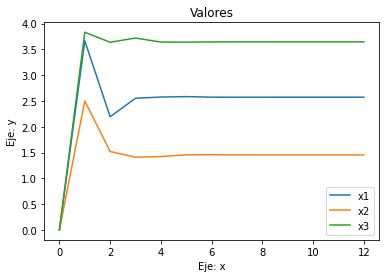

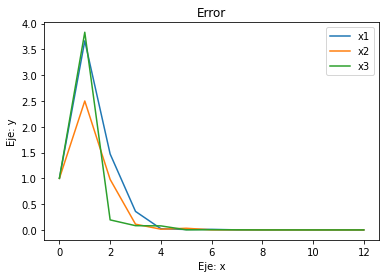

In [4]:
#   Sistema de ecuaciones
from matplotlib import pyplot as plt

x1_reg = []
x2_reg = []
x3_reg = []

error_x1 = []
error_x1.append(1)
error_x2 = []
error_x2.append(1)
error_x3 = []
error_x3.append(1)

def igualar():
    if not x1_reg:
        x1_reg.append(0)
    if len(x2_reg) < len(x1_reg):
        x2_reg.append(0)
    if len(x3_reg) < len(x1_reg):
        x3_reg.append(0)

'''
9x + 2y − z = −2    ->   x   x1 = (-2/9) - ((2/9) * x2 ) - ((1/9) * x3)
7x + 8y + 5z = 3    ->   y   x2 = (3/8) - ((7/8) * x1) - ((5/8) * x3)
3x + 4y − 10z = 6   ->   z   x3 = (6/-10) - ((3/-10) * x1) - ((4/-10) * x2)

5x1 + 2x2 = 12  ->  x1 = (12/5) - ((2/5) * x2)
−x1 + 10x2 = 8  ->  x2 = (8/10) + ((1/10) * x1)

8x1 + x2 = 4    ->  x1 = (4/8) - ((1/8) * x2)
2x1 + 5x2 = 3   ->  x2 = (3/5) - ((2/5) * x1)
x1 + 4x3 = 3    ->  x3 = (3/4) - ((1/4) * x1)

6x1 + 2x2 + x3 = 22     ->  x1 = (22/6) - ((2/6) * x2) - ((1/6) * x3)
−x1 + 8x2 + 2x3 = 20    ->  x2 = (20/8) + ((1/8) * x1) - ((3/8) * x3)
x1 − x2 + 6x3 = 23      ->  x3 = (23/6) - ((1/6) * x1) + ((1/6) * x2)
'''

def gn(v,x1,x2,x3):
    if v == 1:
        return ((22/6) - ((2/6) * x2) - ((1/6) * x3))
    elif v == 2:
        return ((20/8) + ((1/8) * x1) - ((3/8) * x3))
    elif v == 3:
        return ((23/6) - ((1/6) * x1) + ((1/6) * x2))

def convergencia():
    contador = 0
    num = 3 #Numero de incognitas
    v = 1

    parada = input("Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: ")
    if(parada == ""):
        parada = 0.0001

    a = input("Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: ")

    if a == "":
        igualar()

    elif a != "":
        x1_reg.append(float(a))
        x2_reg.append(float(input("x2: ")))
        x3_reg.append(float(input("x3: ")))

    igualar()

    while(contador <= 500):
        if v > num:
            igualar()

            if( error_x1[contador] <= float(parada) and error_x2[contador] <= float(parada) and error_x3[contador] <= float(parada)):
                return contador

            contador += 1
            v = 1

        x1 = float(x1_reg[contador])
        x2 = float(x2_reg[contador])
        x3 = float(x3_reg[contador])

        x = gn(v,x1,x2,x3)

        if v == 1:
            x1_reg.append(x)
            error_x1.append(abs(x1_reg[contador + 1] - x1_reg[contador]))
        elif v == 2:
            x2_reg.append(x)
            error_x2.append(abs(x2_reg[contador + 1] - x2_reg[contador]))
        elif v == 3:
            x3_reg.append(x)
            error_x3.append(abs(x3_reg[contador + 1] - x3_reg[contador]))

        v += 1
    return contador

def mostrar(contador):
    if(contador < 500):
        print("Converge")
    else:
        print("No converge")

    for registro in x1_reg:
        print("x1=", registro)
    for registro in x2_reg:
        print("x2=", registro)
    for registro in x3_reg:
        print("x3=", registro)

    for registro in error_x1:
        print("Error x1:", registro)
    for registro in error_x2:
        print("Error x2:", registro)
    for registro in error_x3:
        print("Error x3:", registro)

    plt.plot(x1_reg,label='x1')
    plt.plot(x2_reg,label='x2')
    plt.plot(x3_reg,label='x3')

    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Valores")
    plt.legend()
    plt.show()

    plt.plot(error_x1,label= 'x1')
    plt.plot(error_x2,label= 'x2')
    plt.plot(error_x3,label= 'x3')

    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Error")
    plt.legend()
    plt.show()

mostrar(convergencia())

Metodo de Gauss-Saidel

Ejercicio 1

Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: 
Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: 
Converge
x1= 0
x1= -0.2222222222222222
x1= -0.3
x1= -0.38870370370370366
x1= -0.3875092592592592
x1= -0.3912649691358025
x1= -0.3910274151234568
x1= -0.3911957807355967
x1= -0.3911774643711419
x1= -0.39118539542320385
x2= 0
x2= 0.5694444444444444
x2= 0.9118055555555555
x2= 0.9184143518518517
x2= 0.9323489583333334
x2= 0.931927594521605
x2= 0.9325292713155864
x2= 0.9324816306503987
x2= 0.9325090825500739
x2= 0.932505724927374
x3= 0
x3= -0.4388888888888889
x3= -0.3252777777777777
x3= -0.3492453703703704
x3= -0.34331319444444436
x3= -0.3446084529320987
x3= -0.34429651601080247
x3= -0.3443660819605195
x3= -0.34434960629131295
x3= -0.34435332865601154
Error x1: 1
Error x1: 0.2222222222222222
Error x1: 0.07777777777777778
Error x1: 0.08870370370370367
Error x1: 0.0011944444444444424
Error x1: 0.0037557098765432784
E

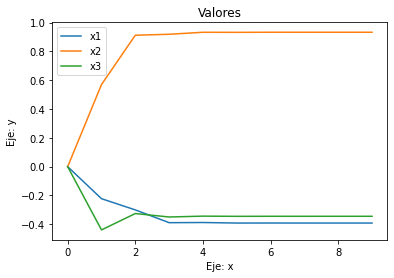

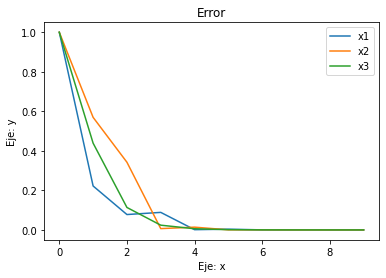

In [12]:
#   Sistema de ecuaciones
from matplotlib import pyplot as plt

x1_reg = []
x2_reg = []
x3_reg = []

error_x1 = []
error_x1.append(1)
error_x2 = []
error_x2.append(1)
error_x3 = []
error_x3.append(1)

def igualar():
    if not x1_reg:
        x1_reg.append(0)
    if len(x2_reg) < len(x1_reg):
        x2_reg.append(0)
    if len(x3_reg) < len(x1_reg):
        x3_reg.append(0)

'''
9x + 2y − z = −2    ->   x   x1 = (-2/9) - ((2/9) * x2 ) - ((1/9) * x3)
7x + 8y + 5z = 3    ->   y   x2 = (3/8) - ((7/8) * x1) - ((5/8) * x3)
3x + 4y − 10z = 6   ->   z   x3 = (6/-10) - ((3/-10) * x1) - ((4/-10) * x2)

5x1 + 2x2 = 12  ->  x1 = (12/5) - ((2/5) * x2)
−x1 + 10x2 = 8  ->  x2 = (8/10) + ((1/10) * x1)

8x1 + x2 = 4    ->  x1 = (4/8) - ((1/8) * x2)
2x1 + 5x2 = 3   ->  x2 = (3/5) - ((2/5) * x1)
x1 + 4x3 = 3    ->  x3 = (3/4) - ((1/4) * x1)

6x1 + 2x2 + x3 = 22     ->  x1 = (22/6) - ((2/6) * x2) - ((1/6) * x3)
−x1 + 8x2 + 2x3 = 20    ->  x2 = (20/8) + ((1/8) * x1) - ((3/8) * x3)
x1 − x2 + 6x3 = 23      ->  x3 = (23/6) - ((1/6) * x1) + ((1/6) * x2)
'''

def gn(v,x1,x2,x3):
    if v == 1:
        return ((-2/9) - ((2/9) * x2 ) - ((1/9) * x3))
    elif v == 2:
        return ((3/8) - ((7/8) * x1) - ((5/8) * x3))
    elif v == 3:
        return ((6/-10) - ((3/-10) * x1) - ((4/-10) * x2))

def convergencia():
    contador = 0
    num = 3 #Numero de incognitas
    v = 1

    parada = input("Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: ")
    if(parada == ""):
        parada = 0.0001

    a = input("Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: ")

    if a == "":
        igualar()

    elif a != "":
        x1_reg.append(float(a))
        x2_reg.append(float(input("x2: ")))
        x3_reg.append(float(input("x3: ")))

    igualar()

    while(contador <= 500):
        if v > num:
            igualar()

            if( error_x1[contador] <= float(parada) and error_x2[contador] <= float(parada) and error_x3[contador] <= float(parada)):
                return contador

            contador += 1
            v = 1

        x1 = float(x1_reg[-1])
        x2 = float(x2_reg[-1])
        x3 = float(x3_reg[-1])

        x = gn(v,x1,x2,x3)

        if v == 1:
            x1_reg.append(x)
            error_x1.append(abs(x1_reg[contador + 1] - x1_reg[contador]))
        elif v == 2:
            x2_reg.append(x)
            error_x2.append(abs(x2_reg[contador + 1] - x2_reg[contador]))
        elif v == 3:
            x3_reg.append(x)
            error_x3.append(abs(x3_reg[contador + 1] - x3_reg[contador]))

        v += 1
    return contador

def mostrar(contador):
    if(contador < 500):
        print("Converge")
    else:
        print("No converge")

    for registro in x1_reg:
        print("x1=", registro)
    for registro in x2_reg:
        print("x2=", registro)
    for registro in x3_reg:
        print("x3=", registro)

    for registro in error_x1:
        print("Error x1:", registro)
    for registro in error_x2:
        print("Error x2:", registro)
    for registro in error_x3:
        print("Error x3:", registro)

    plt.plot(x1_reg,label='x1')
    plt.plot(x2_reg,label='x2')
    plt.plot(x3_reg,label='x3')

    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Valores")
    plt.legend()
    plt.show()

    plt.plot(error_x1,label= 'x1')
    plt.plot(error_x2,label= 'x2')
    plt.plot(error_x3,label= 'x3')

    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Error")
    plt.legend()
    plt.show()

mostrar(convergencia())

Ejercicio 2

Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: 
Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: 
Converge
x1= 0
x1= 2.4
x1= 1.984
x1= 2.0006399999999998
x1= 1.9999744
x1= 2.000001024
x1= 1.99999995904
x2= 0
x2= 1.04
x2= 0.9984000000000001
x2= 1.000064
x2= 0.99999744
x2= 1.0000001024
x2= 0.999999995904
Error x1: 1
Error x1: 2.4
Error x1: 0.4159999999999999
Error x1: 0.016639999999999766
Error x1: 0.0006655999999998219
Error x1: 2.6623999999975112e-05
Error x1: 1.0649599999634773e-06
Error x2: 1
Error x2: 1.04
Error x2: 0.04159999999999997
Error x2: 0.0016639999999999988
Error x2: 6.65600000000488e-05
Error x2: 2.6624000000197157e-06
Error x2: 1.064960000185522e-07


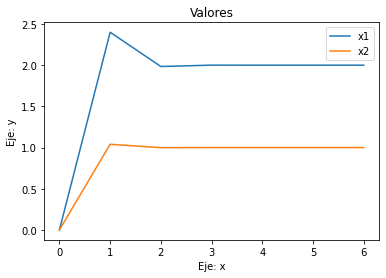

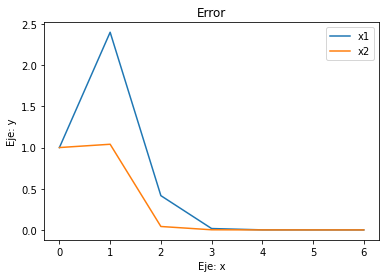

In [15]:
#   Sistema de ecuaciones
from matplotlib import pyplot as plt

x1_reg = []
x2_reg = []

error_x1 = []
error_x1.append(1)
error_x2 = []
error_x2.append(1)

def igualar():
    if not x1_reg:
        x1_reg.append(0)
    if len(x2_reg) < len(x1_reg):
        x2_reg.append(0)
    
'''
9x + 2y − z = −2    ->   x   x1 = (-2/9) - ((2/9) * x2 ) - ((1/9) * x3)
7x + 8y + 5z = 3    ->   y   x2 = (3/8) - ((7/8) * x1) - ((5/8) * x3)
3x + 4y − 10z = 6   ->   z   x3 = (6/-10) - ((3/-10) * x1) - ((4/-10) * x2)

5x1 + 2x2 = 12  ->  x1 = (12/5) - ((2/5) * x2)
−x1 + 10x2 = 8  ->  x2 = (8/10) + ((1/10) * x1)

8x1 + x2 = 4    ->  x1 = (4/8) - ((1/8) * x2)
2x1 + 5x2 = 3   ->  x2 = (3/5) - ((2/5) * x1)
x1 + 4x3 = 3    ->  x3 = (3/4) - ((1/4) * x1)

6x1 + 2x2 + x3 = 22     ->  x1 = (22/6) - ((2/6) * x2) - ((1/6) * x3)
−x1 + 8x2 + 2x3 = 20    ->  x2 = (20/8) + ((1/8) * x1) - ((3/8) * x3)
x1 − x2 + 6x3 = 23      ->  x3 = (23/6) - ((1/6) * x1) + ((1/6) * x2)
'''
        
def gn(v,x1,x2):
    if v == 1:
        return ((12/5) - ((2/5) * x2))
    elif v == 2:
        return ((8/10) + ((1/10) * x1))

def convergencia():
    contador = 0
    num = 2 #Numero de incognitas
    v = 1

    parada = input("Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: ")
    if(parada == ""):
        parada = 0.0001

    a = input("Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: ")

    if a == "":
        igualar()

    elif a != "":
        x1_reg.append(float(a))
        x2_reg.append(float(input("x2: ")))
        
    igualar()

    while(contador <= 500):
        if v > num:
            igualar()

            if( error_x1[contador] <= float(parada) and error_x2[contador] <= float(parada)):
                return contador
            
            contador += 1
            v = 1

        x1 = float(x1_reg[-1])
        x2 = float(x2_reg[-1])
    
        x = gn(v,x1,x2)

        if v == 1:
            x1_reg.append(x)
            error_x1.append(abs(x1_reg[contador + 1] - x1_reg[contador]))
        elif v == 2:
            x2_reg.append(x)
            error_x2.append(abs(x2_reg[contador + 1] - x2_reg[contador]))
            
        v += 1
    return contador

def mostrar(contador):
    if(contador < 500):
        print("Converge")
    else:
        print("No converge")

    for registro in x1_reg:
        print("x1=", registro)
    for registro in x2_reg:
        print("x2=", registro)
        
    for registro in error_x1:
        print("Error x1:", registro)
    for registro in error_x2:
        print("Error x2:", registro)
        
    plt.plot(x1_reg,label='x1')
    plt.plot(x2_reg,label='x2')
    
    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Valores")
    plt.legend()
    plt.show()

    plt.plot(error_x1,label= 'x1')
    plt.plot(error_x2,label= 'x2')
    
    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Error")
    plt.legend()
    plt.show()

mostrar(convergencia())

Ejercicio 3

Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: 
Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: 
Converge
x1= 0
x1= 0.5
x1= 0.45
x1= 0.4475
x1= 0.447375
x1= 0.44736875
x1= 0.4473684375
x2= 0
x2= 0.39999999999999997
x2= 0.41999999999999993
x2= 0.42099999999999993
x2= 0.4210499999999999
x2= 0.42105249999999994
x2= 0.42105262499999996
x3= 0
x3= 0.625
x3= 0.6375
x3= 0.638125
x3= 0.63815625
x3= 0.6381578125
x3= 0.6381578906250001
Error x1: 1
Error x1: 0.5
Error x1: 0.04999999999999999
Error x1: 0.0025000000000000022
Error x1: 0.00012499999999998623
Error x1: 6.250000000040945e-06
Error x1: 3.1249999998816946e-07
Error x2: 1
Error x2: 0.39999999999999997
Error x2: 0.019999999999999962
Error x2: 0.0010000000000000009
Error x2: 4.999999999999449e-05
Error x2: 2.500000000016378e-06
Error x2: 1.2500000001747225e-07
Error x3: 1
Error x3: 0.625
Error x3: 0.012499999999999956
Error x3: 0.0006250000000000977
Error x3: 

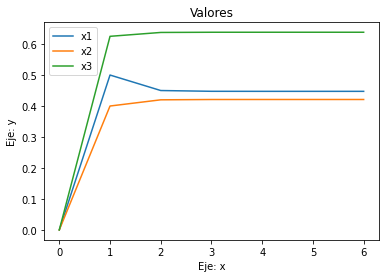

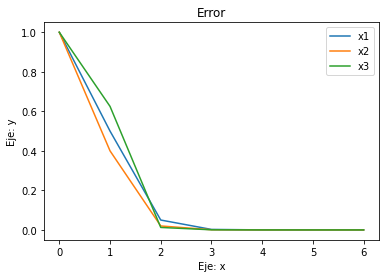

In [14]:
#   Sistema de ecuaciones
from matplotlib import pyplot as plt

x1_reg = []
x2_reg = []
x3_reg = []

error_x1 = []
error_x1.append(1)
error_x2 = []
error_x2.append(1)
error_x3 = []
error_x3.append(1)

def igualar():
    if not x1_reg:
        x1_reg.append(0)
    if len(x2_reg) < len(x1_reg):
        x2_reg.append(0)
    if len(x3_reg) < len(x1_reg):
        x3_reg.append(0)

'''
9x + 2y − z = −2    ->   x   x1 = (-2/9) - ((2/9) * x2 ) - ((1/9) * x3)
7x + 8y + 5z = 3    ->   y   x2 = (3/8) - ((7/8) * x1) - ((5/8) * x3)
3x + 4y − 10z = 6   ->   z   x3 = (6/-10) - ((3/-10) * x1) - ((4/-10) * x2)

5x1 + 2x2 = 12  ->  x1 = (12/5) - ((2/5) * x2)
−x1 + 10x2 = 8  ->  x2 = (8/10) + ((1/10) * x1)

8x1 + x2 = 4    ->  x1 = (4/8) - ((1/8) * x2)
2x1 + 5x2 = 3   ->  x2 = (3/5) - ((2/5) * x1)
x1 + 4x3 = 3    ->  x3 = (3/4) - ((1/4) * x1)

6x1 + 2x2 + x3 = 22     ->  x1 = (22/6) - ((2/6) * x2) - ((1/6) * x3)
−x1 + 8x2 + 2x3 = 20    ->  x2 = (20/8) + ((1/8) * x1) - ((3/8) * x3)
x1 − x2 + 6x3 = 23      ->  x3 = (23/6) - ((1/6) * x1) + ((1/6) * x2)
'''

def gn(v,x1,x2,x3):
    if v == 1:
        return ((4/8) - ((1/8) * x2))
    elif v == 2:
        return ((3/5) - ((2/5) * x1))
    elif v == 3:
        return ((3/4) - ((1/4) * x1))

def convergencia():
    contador = 0
    num = 3 #Numero de incognitas
    v = 1

    parada = input("Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: ")
    if(parada == ""):
        parada = 0.0001

    a = input("Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: ")

    if a == "":
        igualar()

    elif a != "":
        x1_reg.append(float(a))
        x2_reg.append(float(input("x2: ")))
        x3_reg.append(float(input("x3: ")))

    igualar()

    while(contador <= 500):
        if v > num:
            igualar()

            if( error_x1[contador] <= float(parada) and error_x2[contador] <= float(parada) and error_x3[contador] <= float(parada)):
                return contador

            contador += 1
            v = 1

        x1 = float(x1_reg[-1])
        x2 = float(x2_reg[-1])
        x3 = float(x3_reg[-1])

        x = gn(v,x1,x2,x3)

        if v == 1:
            x1_reg.append(x)
            error_x1.append(abs(x1_reg[contador + 1] - x1_reg[contador]))
        elif v == 2:
            x2_reg.append(x)
            error_x2.append(abs(x2_reg[contador + 1] - x2_reg[contador]))
        elif v == 3:
            x3_reg.append(x)
            error_x3.append(abs(x3_reg[contador + 1] - x3_reg[contador]))

        v += 1
    return contador

def mostrar(contador):
    if(contador < 500):
        print("Converge")
    else:
        print("No converge")

    for registro in x1_reg:
        print("x1=", registro)
    for registro in x2_reg:
        print("x2=", registro)
    for registro in x3_reg:
        print("x3=", registro)

    for registro in error_x1:
        print("Error x1:", registro)
    for registro in error_x2:
        print("Error x2:", registro)
    for registro in error_x3:
        print("Error x3:", registro)

    plt.plot(x1_reg,label='x1')
    plt.plot(x2_reg,label='x2')
    plt.plot(x3_reg,label='x3')

    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Valores")
    plt.legend()
    plt.show()

    plt.plot(error_x1,label= 'x1')
    plt.plot(error_x2,label= 'x2')
    plt.plot(error_x3,label= 'x3')

    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Error")
    plt.legend()
    plt.show()

mostrar(convergencia())

Ejercicio 4

Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: 
Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: 
Converge
x1= 0
x1= 3.6666666666666665
x1= 2.0613425925925926
x1= 2.5923233346193415
x1= 2.583362874125693
x1= 2.5730163676645588
x1= 2.5740293274269477
x1= 2.574163983552753
x1= 2.574132126436545
x1= 2.574131865245288
x2= 0
x2= 2.9583333333333335
x2= 1.3644386574074074
x2= 1.4300969127764915
x2= 1.4580595106308898
x2= 1.454458506176495
x2= 1.4541635322713726
x2= 1.4542621101413178
x2= 1.454260382892783
x2= 1.4542584671271461
x3= 0
x3= 3.7152777777777777
x3= 3.717182677469136
x3= 3.6396289296928583
x3= 3.645782772750866
x3= 3.6469070230853227
x3= 3.6466890341407376
x3= 3.6466830210980943
x3= 3.6466880427427064
x3= 3.64668776698031
Error x1: 1
Error x1: 3.6666666666666665
Error x1: 1.605324074074074
Error x1: 0.5309807420267489
Error x1: 0.008960460493648625
Error x1: 0.010346506461134108
Error x1: 0.00101295976

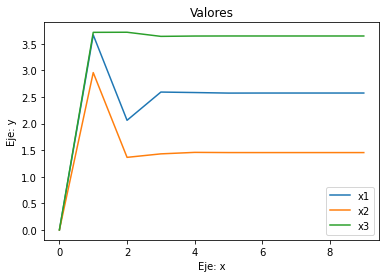

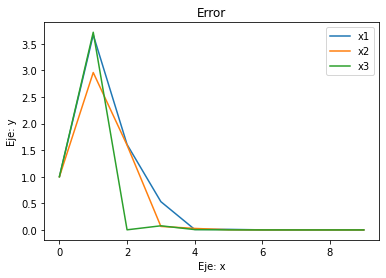

In [6]:
#   Sistema de ecuaciones
from matplotlib import pyplot as plt

x1_reg = []
x2_reg = []
x3_reg = []

error_x1 = []
error_x1.append(1)
error_x2 = []
error_x2.append(1)
error_x3 = []
error_x3.append(1)

def igualar():
    if not x1_reg:
        x1_reg.append(0)
    if len(x2_reg) < len(x1_reg):
        x2_reg.append(0)
    if len(x3_reg) < len(x1_reg):
        x3_reg.append(0)

'''
9x + 2y − z = −2    ->   x   x1 = (-2/9) - ((2/9) * x2 ) - ((1/9) * x3)
7x + 8y + 5z = 3    ->   y   x2 = (3/8) - ((7/8) * x1) - ((5/8) * x3)
3x + 4y − 10z = 6   ->   z   x3 = (6/-10) - ((3/-10) * x1) - ((4/-10) * x2)

5x1 + 2x2 = 12  ->  x1 = (12/5) - ((2/5) * x2)
−x1 + 10x2 = 8  ->  x2 = (8/10) + ((1/10) * x1)

8x1 + x2 = 4    ->  x1 = (4/8) - ((1/8) * x2)
2x1 + 5x2 = 3   ->  x2 = (3/5) - ((2/5) * x1)
x1 + 4x3 = 3    ->  x3 = (3/4) - ((1/4) * x1)

6x1 + 2x2 + x3 = 22     ->  x1 = (22/6) - ((2/6) * x2) - ((1/6) * x3)
−x1 + 8x2 + 2x3 = 20    ->  x2 = (20/8) + ((1/8) * x1) - ((3/8) * x3)
x1 − x2 + 6x3 = 23      ->  x3 = (23/6) - ((1/6) * x1) + ((1/6) * x2)
'''

def gn(v,x1,x2,x3):
    if v == 1:
        return ((22/6) - ((2/6) * x2) - ((1/6) * x3))
    elif v == 2:
        return ((20/8) + ((1/8) * x1) - ((3/8) * x3))
    elif v == 3:
        return ((23/6) - ((1/6) * x1) + ((1/6) * x2))

def convergencia():
    contador = 0
    num = 3 #Numero de incognitas
    v = 1

    parada = input("Presiona ENTER si tu criterio de paro es igual a 0.0001, de lo contrario anotalo: ")
    if(parada == ""):
        parada = 0.0001

    a = input("Si tus valores inciales son iguales a 0 presiona ENTER de lo contrario ingresa el valor de x1: ")

    if a == "":
        igualar()

    elif a != "":
        x1_reg.append(float(a))
        x2_reg.append(float(input("x2: ")))
        x3_reg.append(float(input("x3: ")))

    igualar()

    while(contador <= 500):
        if v > num:
            igualar()

            if( error_x1[contador] <= float(parada) and error_x2[contador] <= float(parada) and error_x3[contador] <= float(parada)):
                return contador

            contador += 1
            v = 1

        x1 = float(x1_reg[-1])
        x2 = float(x2_reg[-1])
        x3 = float(x3_reg[-1])

        x = gn(v,x1,x2,x3)

        if v == 1:
            x1_reg.append(x)
            error_x1.append(abs(x1_reg[contador + 1] - x1_reg[contador]))
        elif v == 2:
            x2_reg.append(x)
            error_x2.append(abs(x2_reg[contador + 1] - x2_reg[contador]))
        elif v == 3:
            x3_reg.append(x)
            error_x3.append(abs(x3_reg[contador + 1] - x3_reg[contador]))

        v += 1
    return contador

def mostrar(contador):
    if(contador < 500):
        print("Converge")
    else:
        print("No converge")

    for registro in x1_reg:
        print("x1=", registro)
    for registro in x2_reg:
        print("x2=", registro)
    for registro in x3_reg:
        print("x3=", registro)

    for registro in error_x1:
        print("Error x1:", registro)
    for registro in error_x2:
        print("Error x2:", registro)
    for registro in error_x3:
        print("Error x3:", registro)

    plt.plot(x1_reg,label='x1')
    plt.plot(x2_reg,label='x2')
    plt.plot(x3_reg,label='x3')

    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Valores")
    plt.legend()
    plt.show()

    plt.plot(error_x1,label= 'x1')
    plt.plot(error_x2,label= 'x2')
    plt.plot(error_x3,label= 'x3')

    plt.xlabel('Eje: x')
    plt.ylabel('Eje: y')
    plt.title("Error")
    plt.legend()
    plt.show()

mostrar(convergencia())